**Course website**: http://www.leouieda.com/matematica-especial

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Integração Numérica

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [4]:
# Dessa vez vamos precisar da biblioteca matemática "math"
# Ela define funções como sin, cos, tan, exp e constantes como pi
import math
%matplotlib inline
import matplotlib.pyplot as plt

## Regra dos retângulos

O jeito mais simples de integração numérica é a regra dos retângulos. Nela, aproximamos a integral pela soma das áreas de retângulos. Cada retângulo se encontra abaixo de um dos pontos dos dados. A largura do retângulo é o espaçamento entre os dados $\Delta$. A altura do retângulo é o valor do dado naquela posição $d_i$.

Se tivermos nossos dados em um vetor de dados $\bar{d}$ (**nota**: vetores serão representados com uma barra em cima):

$$
\bar{d} = \left[ d_1 ~ d_2 ~ d_3 ~ \ldots ~ d_N \right],
$$

a integral poderá ser aproximada pela soma das áreas dos retângulos:

$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Algoritmo

Utilize a célula vazia abaixo (tipo Markdown) para colocar uma descrição do algoritmo em português (não em código). Não se esqueça de relacionar os passos do algoritmo com as fórmulas matemáticas do método.

**Dicas**:

* Help sobre Markdown: https://help.github.com/articles/markdown-basics/
* Como utilizar fórmulas matemáticas: https://www.sharelatex.com/learn/Mathematical_expressions


Na regra do Retangulo:
N e o numero de dados e i e o indice de cada retangulo
Total de retangulos = N-1
Calcula a area de cada retangulo multiplicando di (altura do retangulo) vezes delta (espaçamento entre os dados - largura do retangulo)
Soma todas as areas do numero total de retangulos (N-1)

### Dados para teste

Vamos utilizar dados gerados a partir de uma função $d(t) = \cos(t)$ para testar o método de integração. A vantagem do cosseno é que sabemos quanto deve ser a integral:

$$
\int\limits_a^b \cos(t) dt = \sin(b) - \sin(a)
$$

O código abaixo gera duas listas: uma com os tempos variando entre os limites de integração; outra com os valores correspondentes do cosseno.

In [4]:
# inicio e fim são os intervalos de integração
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))

Espaçamento entre os dados: 0.0320570678937734


Utilize a célula abaixo para gerar um gráfico de `dados` por `tempos`.

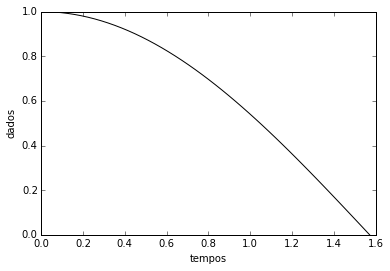

In [5]:
plt.figure()
plt.plot(tempos, dados, "-k")
plt.xlabel("tempos")
plt.ylabel("dados")

### Implementação

Implemente a regra dos retângulos para integrar os dados gerados acima. Coloque seu cógido na célula abaixo.

In [6]:
soma = 0
for dado in dados:
    soma=soma+dado
rescalc = soma*intervalo
print(rescalc)

1.0159428945132496


Nas células abaixo calcule e imprima:

1. A solução analítica (verdadeira) para a integral
2. O erro cometido $E = \left|res_{true} - res_{calc}\right|$

Dica: a função `abs` calcula o valor absoluto de um número.

In [7]:
restrue = math.sin(fim) - math.sin(inicio)
print(restrue)

1.0


In [8]:
erro = abs(restrue - rescalc)
print(erro)

0.015942894513249595


**Responda na célula abaixo:** Por que o erro não é zero e quais são os fatores que influenciam o erro?

O erro existe devido a uma falha no calculo da curva, na qual "sobram" partes do retangulo para fora e ficam espaços vazios dentro, sendo um resultado não preciso. 

### Resultado esperado

No caso acima estamos integrando o cosseno de 0 a $\pi/2$, então o valor esperado da integral é 1. Seu resultado não será exatamente 1 mas deve estar entre 0.9 e 1.1.

## Regra dos trapézios

A regra dos trapézios é parecida com a regra dos retângulos. Mas utilizaremos a área de um trapézio ao invés da área de um retângulo. O trapézio será definido com base em dois pontos adjacentes nos dados ($d_i$ e $d_{i+1}$, por exemplo).

$$
A = \sum\limits_{i=1}^{N - 1} \Delta \frac{d_i + d_{i+1}}{2}
$$

### Algoritmo

Descreva abaixo o algoritmo utilizado (em português) para fazer a integração numérica utilizando a regra dos trapézios.

### Implementação

Vamos utilizar os mesmo dados utilizados na regra dos retângulos (na dúvida, rode novamente a célula que gera os dados). Abaixo, escreva e rode o código que faz a integração numérica com a regra dos trapézios. 

Intervalo de Dados: 0.0320570678937734
Tempo: [0.0, 0.0320570678937734, 0.0641141357875468, 0.09617120368132019, 0.1282282715750936, 0.16028533946886697, 0.19234240736264038, 0.2243994752564138, 0.2564565431501872, 0.28851361104396056, 0.32057067893773394, 0.3526277468315074, 0.38468481472528077, 0.41674188261905415, 0.4487989505128276, 0.48085601840660097, 0.5129130863003744, 0.5449701541941477, 0.5770272220879211, 0.6090842899816945, 0.6411413578754679, 0.6731984257692414, 0.7052554936630148, 0.7373125615567881, 0.7693696294505615, 0.8014266973443349, 0.8334837652381083, 0.8655408331318817, 0.8975979010256552, 0.9296549689194286, 0.9617120368132019, 0.9937691047069753, 1.0258261726007487, 1.0578832404945222, 1.0899403083882955, 1.121997376282069, 1.1540544441758422, 1.1861115120696157, 1.218168579963389, 1.2502256478571625, 1.2822827157509358, 1.3143397836447093, 1.3463968515384828, 1.378453919432256, 1.4105109873260295, 1.4425680552198028, 1.4746251231135763, 1.5066821910073496, 1.5

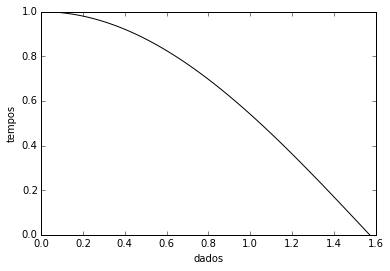

In [9]:
#Primeiramente precisaremos utilizar a biblioteca de matemática no Python, para isso devemos importar essa biblioteca:

import math

# inicio e fim são os intervalos de integração no eixo x
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!

#Dividimos o valor total de Dados por N, com isso encontramos o intervalo entre os pontos destacados de Dados. 
#Nesse Caso iremos definir N=50, mas poderíamos trabalhar com qualquer número.
N=50
#Lembre-se quanto maior o valor de N, mais próximo iremos chegar do valor real. 
#Também podemos afirmar que este é o módulo da base do trapézio. 
intervalo = (fim - inicio)/(N - 1)
#A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
print('Intervalo de Dados:', intervalo)

#Após obtermos o espaçamento, podemos encontrar onde se encontra cada valor dos pontos de Dados:
dados = []
tempos = []
for i in range(N): # i será cada valor de N, ou seja 0,1,2,...,n 
    t = inicio + i*intervalo # t será os valores que encontraremos em dados nos pontos que N intercepta.
    tempos.append(t) #Aqui definimos que tempos será o conjunto de todos os valores de t encontrados em Dados.
    dados.append(math.cos(t)) #Aqui definimos que dados será nosso conjunto de todos os valores do eixo y no ponto t.

print('Tempo:',tempos)
print('Dados:',dados)

#Agora que temos todos os intervalos, podemos calcular a Área da Integral. 
#Vamos Encontrar a área de cada um dos 49 trapézios que definimos anteriormente. 

areas_dos_trapezios = []
j=0
for j in range(N-1):
    pontos = dados[j] + dados[j+1]
    area_trapezio = (intervalo*pontos)/2
    areas_dos_trapezios.append(area_trapezio)
print('Listas das áreas dos trapézios parciais das integrais:',areas_dos_trapezios)

integral = 0
for elemento in areas_dos_trapezios:
    integral = integral + elemento
print('Valor da Integral:',integral)


import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure()
plt.plot(tempos,dados,'-k')
plt.xlabel('dados')
plt.ylabel('tempos')
plt.show()

Calcule e imprima também a solução analíca e o erro cometido.

In [10]:
valor = math.sin(fim) - math.sin(inicio)
print('Solução Analítica da Integração:', valor)


erro = abs(valor - integral)
print('Variável de Erro:',erro)


Solução Analítica da Integração: 1.0
Variável de Erro: 8.563943363693038e-05


**Responda na célula abaixo:** O erro é maior ou menos que para a regra dos retângulos? Por que? Você esperava isso?

### Resultado esperado

Novamente, o valos esperado é 1 mas seu resultado não será exatamente 1 (mas deve estar entre 0.9 e 1.1).

## Comparação dos dois métodos

Vamos comparar o erro de ambos métodos. Uma comparação muito utilizada em métodos numéricos em geral é como o erro varia com o número de dados (ou pontos) utilizados.

Nas células abaixo, calcule o erro da integração numérica para diferentes valores de `N`. Os valores de N deverão variar de 10 a 1000 de 10 em 10. Mantenha os intervalos de integração entre $0$ e $\pi/2$. Faça esse cálculo para os dois métodos: retângulos e trapézios.

Ao final, faça um gráfico do erro pelos valores de `N`. O gráfico deverá ter duas curvas, uma para cada método. O eixo y (erros) deverá estar em escala logarítmica.

**Dicas**: 

* Gere uma lista dos valores de `N`.
* Para colocar o eixo y em escala log: `plt.yscale('log')`

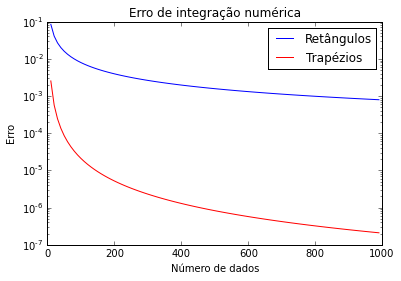

In [12]:
# inicio e fim são os nomes para os intervalos de integração
inicio = 0
fim = math.pi/2 # Utilizamos angulos em radianos em funções trigonométricas
N = range(10, 1000, 10)
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é feita por N - 1 pois existem N - 1 intervalos dentro de N pontos
in_anal = math.sin(math.pi/2) - math.sin(0) #a variavel de integracao analitica foi criada. Para isso, subtraímos o seno de 0 do seno de pi sobre dois.
lista_erro_ret = []
lista_erro_trap = []

for N in range(10,1000,10): #faz com que os calculos de erro sejam feitos varias vezes, um para cada N.
    intervalo = (fim - inicio)/(N - 1)
    tempos = []
    dados = []
    for i in range(N):
        t = inicio + i*intervalo
        tempos.append(t)
        dados.append(math.cos(t))
        
    #Calculando o somatorio por retangulos
    integral = 0 
    for x in range(N): # x serve para indicar a posicao de cada dado, utilizando todos os dados
        retangulo = intervalo*dados[x] # cada retangulo e determinado pela multiplicacao entre tempos e dados na mesma posicao
        integral = integral+retangulo # a integral considera o somatorio dos retangulos
    
    erro = in_anal - integral #serve para calcular o erro para cada elemento
    if erro < 0:
        erro = erro*(-1) #criamos uma condicao para representar o modulo, para que todo valor negativo se torne positivo.
    lista_erro_ret.append(erro) #adicionamos o erro encontrado a lista de erros do retangulo
    
    #calculando o  somatorio por trapezios
    
    integral_trap = 0 
    for y in range(N-1): # y serve para indicar a posicao de cada dado, utilizando todos os dados
        trapezio = intervalo*((dados[y]+dados[y+1])/2)
        #determinaremos cada trapezio pela soma dos dois proximos espacamentos dividido por dois e depois multiplicando esse resultado pela altura equivalente
        integral_trap = integral_trap+trapezio # a integral considera o somatorio dos trapezios
        
    erro_trap = in_anal - integral_trap #serve para calcularmos o erro para cada elemento
    if erro_trap < 0:
        erro_trap = erro_trap*(-1) # outra vez criamos uma condicao para representar o modulo,para que todo valor negativo se torne positivo. 
    lista_erro_trap.append(erro_trap) #adicionamos o erro encontrado a lista de erros do trapezio

plt.figure() #serve para criar uma figura em branco
plt.plot(range(10,1000,10), lista_erro_ret, 'b', label='Retângulos')
plt.plot(range(10,1000,10), lista_erro_trap, 'r', label='Trapézios') #serve para preencher a figura com os dados que foram organizados
plt.title("Erro de integração numérica") #título
plt.yscale('log')
plt.xlabel(u"Número de dados") #para nomear o eixo X
plt.ylabel("Erro") #para nomear o eixo Y
plt.legend(loc='upper right')

**Responda na célula abaixo**: Como o erro varia com `N` para os dois métodos? Aumentar o número de dados de 50 para 200 nos dá a mesma diminuição no erro que aumentar de 650 para 800? Sempre vale a pena utilizar mais dados (lembre-se que a escala é logarítmica)? 

O erro dos trapézios vai diminuindo conforme o numero de dados vai aumentando. A diminuição do erro em aumentar o numero de dados de 50 para 200 é mais significativa, porque a curva sofre menos alterações a partir de aproximadamente 500 dados. Acredito que é sempre válido acrescentar dados novos, mas que a partir de um certo momento, eles já não são tão relevantes.

### Resultado esperado

O gráfico ao final deverá ser parecido com:

![images/erro-por-ndados.png](images/erro-por-ndados.png)

## Tarefa bônus: Probabilidades

Vamos assumir que uma variável aleatória $x$ segue uma [distribuição normal](https://en.wikipedia.org/wiki/Normal_distribution) com média zero e desvio padrão $\sigma$. Isso quer dizer que a [densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) para $x$ é

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{x^2}{2 \sigma^2} \right)
$$

A probabilidade de $x$ cair no intervalo $[a, b]$ é dada por ([refência](https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution)):

$$
P(a \leq x \leq b) = \int\limits_a^b f(x) dx
$$

Calcule na célula abaixo qual é a probabilidade de $x$ estar entre $[-\sigma, +\sigma]$ para $\sigma = 5$.

SyntaxError: invalid syntax (<ipython-input-13-781e78eb2355>, line 1)